<a href="https://colab.research.google.com/github/Eriyon24/UFC-Fight-Analysis/blob/main/UFC_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import io
from google.colab import files

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://www.bestfightodds.com/'
}


def scrape_ufc_fight_data():
    # ... (Your existing scrape_ufc_fight_data function code) ...
    # Indent the code within the function
    # Define the URL to Scrape
    event_url = "http://ufcstats.com/statistics/events/completed"
    # This send a request to UFC website
    response = requests.get(event_url, headers=HEADERS)  # add headers=HEADERS

    if response.status_code != 200:
        print(f"Retrieving UFC events page failed. Status Code: {response.status_code}")
        return pd.DataFrame()

    # This parse the HTML Using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    # ... (rest of your scrape_ufc_fight_data function code) ...



# Upload your CSV file using the file upload dialog
uploaded = files.upload()

# Get the filename from the uploaded file dictionary
filename = list(uploaded.keys())[0]

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# add function to make sure correct data types
df['date'] = pd.to_datetime(df['date'], errors='coerce')




Saving UFC_data_fights.csv to UFC_data_fights.csv


Data *Cleaning/exploration

In [ ]:
print(df.head())

            R_fighter         B_fighter  R_odds  B_odds       date  \
0           Kevin Lee  Charles Oliveira  -145.0   135.0 2020-03-14   
1         Demian Maia     Gilbert Burns   160.0  -170.0 2020-03-14   
2      Renato Moicano    Damir Hadzovic  -345.0   315.0 2020-03-14   
3       Johnny Walker     Nikita Krylov  -137.0   127.0 2020-03-14   
4  Francisco Trinaldo     John Makdessi  -160.0   150.0 2020-03-14   

                             location country Winner title_bout  \
0  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
1  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
2  Brasilia, Distrito Federal, Brazil  Brazil    Red      False   
3  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
4  Brasilia, Distrito Federal, Brazil  Brazil    Red      False   

        weight_class gender  
0        Lightweight   MALE  
1       Welterweight   MALE  
2        Lightweight   MALE  
3  Light Heavyweight   MALE  
4        Lightweight   MAL

In [ ]:
print(df.columns)

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'location',
       'country', 'Winner', 'title_bout', 'weight_class', 'gender'],
      dtype='object')


In [ ]:
print(df.shape)

(5528, 11)


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (1287, 11)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   R_fighter     4240 non-null   object        
 1   B_fighter     4240 non-null   object        
 2   R_odds        4240 non-null   float64       
 3   B_odds        4240 non-null   float64       
 4   date          4240 non-null   datetime64[ns]
 5   location      4240 non-null   object        
 6   country       4240 non-null   object        
 7   Winner        4240 non-null   object        
 8   title_bout    4240 non-null   object        
 9   weight_class  4240 non-null   object        
 10  gender        4240 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 475.2+ KB
None


In [ ]:
print(df.isnull().sum())

R_fighter       1288
B_fighter       1288
R_odds          1288
B_odds          1288
date            1288
location        1288
country         1288
Winner          1288
title_bout      1288
weight_class    1288
gender          1288
dtype: int64


In [ ]:
df = df.drop_duplicates()
df.head(5)

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE


In [ ]:
df = df.rename(columns={'R_fighter': 'Red_Fighter', 'B_fighter': 'Blue_Fighter'})
df.head(5)

,Red_Fighter,Blue_Fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE


In [ ]:
df = df.dropna()
df.count

<bound method DataFrame.count of              Red_Fighter      Blue_Fighter  R_odds  B_odds       date  \
0              Kevin Lee  Charles Oliveira  -145.0   135.0 2020-03-14   
1            Demian Maia     Gilbert Burns   160.0  -170.0 2020-03-14   
2         Renato Moicano    Damir Hadzovic  -345.0   315.0 2020-03-14   
3          Johnny Walker     Nikita Krylov  -137.0   127.0 2020-03-14   
4     Francisco Trinaldo     John Makdessi  -160.0   150.0 2020-03-14   
...                  ...               ...     ...     ...        ...   
4235        Duane Ludwig     Darren Elkins  -155.0   135.0 2010-03-21   
4236         John Howard    Daniel Roberts  -210.0   175.0 2010-03-21   
4237      Brendan Schaub     Chase Gormley  -260.0   220.0 2010-03-21   
4238         Mike Pierce     Julio Paulino  -420.0   335.0 2010-03-21   
4239        Eric Schafer       Jason Brilz   140.0  -160.0 2010-03-21   

                                location country Winner title_bout  \
0     Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
1     Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
2     Brasilia, Distrito Federal, Brazil  Brazil    Red      False   
3     Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
4     Brasilia, Distrito Federal, Brazil  Brazil    Red      False   
...                                  ...     ...    ...        ...   
4235           Broomfield, Colorado, USA     USA   Blue      False   
4236           Broomfield, Colorado, USA     USA    Red      False   
4237           Broomfield, Colorado, USA     USA    Red      False   
4238           Broomfield, Colorado, USA     USA    Red      False   
4239           Broomfield, Colorado, USA     USA   Blue      False   

           weight_class gender  
0           Lightweight   MALE  
1          Welterweight   MALE  
2           Lightweight   MALE  
3     Light Heavyweight   MALE  
4           Lightweight   MALE  
...                 ...    ...  
4235        Lightweight   MALE  
4236       Welterweight   MALE  
4237        Heavyweight   MALE  
4238       Welterweight   MALE  
4239  Light Heavyweight   MALE  

[4240 rows x 11 columns]>

How may years data we have in the Data Set?

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head(5)

#Find unique years and their count
unique_years = df['year'].unique()
num_years = len(unique_years)
year_range_correct = num_years == len(df['year'].unique())

#Display the results
print(f"Number of years in the dataset: {num_years}")
print(f"Unique years in the dataset: {unique_years}")
print(f"Is the year range correct? {year_range_correct}")


Number of years in the dataset: 11
Unique years in the dataset: [2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]
Is the year range correct? True


**Step 2: :Labeling Upsets**

In [ ]:
df['is_upset'] = 0 # Initialize 'is_upset' column to 0 (not upset)

# Set 'is_upset' to 1 for upsets based on underdog winning
df.loc[((df['Winner'] == 'Red') & (df['B_odds'] > df['R_odds'])) |
       ((df['Winner'] == 'Blue') & (df['R_odds'] > df['B_odds'])), 'is_upset'] = 1

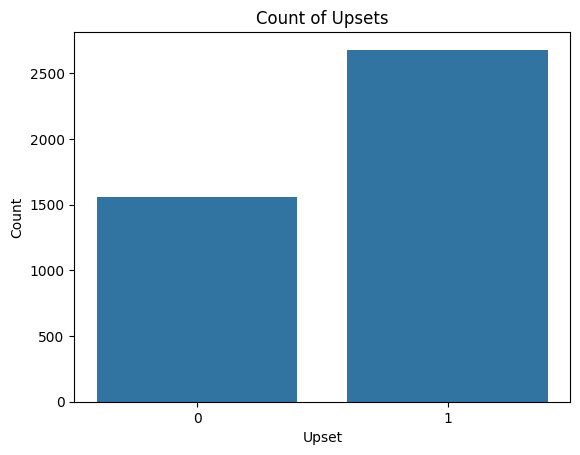

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a countplot of the 'is_upset' column
sns.countplot(x='is_upset', data=df)

#Add labels and title
plt.xlabel('Upset')
plt.ylabel('Count')
plt.title('Count of Upsets')

#Add a legend
# Create proxy artists for the legend (empty plots with the desired labels)
upset_patch = plt.plot([], [], marker='o', linestyle='', label='Upset (1)', color='blue')[0]
no_upset_patch = plt.plot([], [], marker='o', linestyle='', label='No Upset (0)', color='orange')[0]

#Show the plot
plt.show()

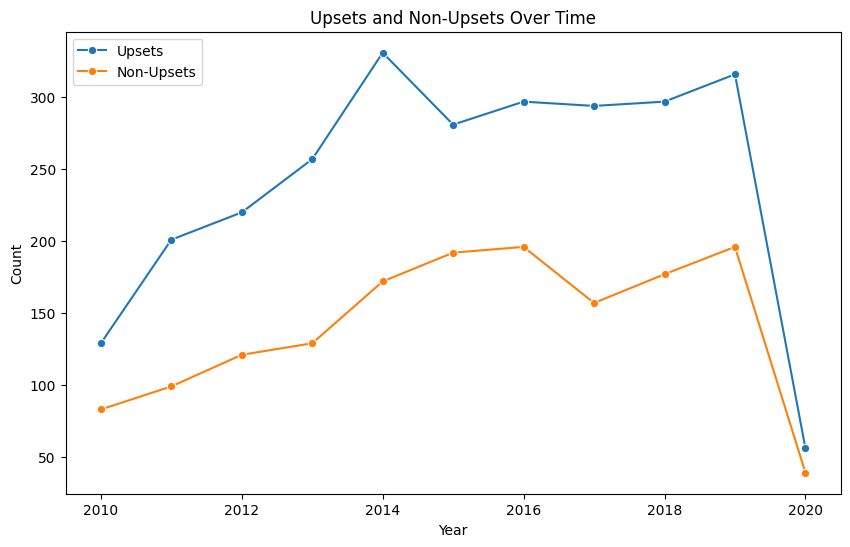

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total fights and upsets per year
fights_per_year = df.groupby('year')['is_upset'].count().reset_index()
upsets_per_year = df.groupby('year')['is_upset'].sum().reset_index()

#Calculate non-upsets per year
fights_per_year['non_upset'] = fights_per_year['is_upset'] - upsets_per_year['is_upset']

# Merge the two DataFrames on 'year'
merged_df = fights_per_year.merge(upsets_per_year, on='year', suffixes=('_fights', '_upsets'))


#Create the line plot
plt.figure(figsize=(10,6))
# Use 'is_upset_upsets' instead of 'is_upset' for the y-axis
sns.lineplot(x='year', y='is_upset_upsets', data=merged_df, label='Upsets', marker='o')
sns.lineplot(x='year', y='non_upset', data=merged_df, label='Non-Upsets', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Upsets and Non-Upsets Over Time')
plt.legend()
plt.show()

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'location',
       'country', 'Winner', 'title_bout', 'weight_class', 'gender'],
      dtype='object')
Odds Difference p-value: 0.0000
Weight class p-value: = 0.2205

Upset Rates by Country:
 country
 Philippines             0.250000
 South Korea             0.250000
 Mexico                  0.197183
 China                   0.193548
USA                      0.181818
 Canada                  0.167155
 Argentina               0.166667
 Australia               0.164634
 Brazil                  0.158151
 Singapore               0.155556
 Croatia                 0.153846
 Denmark                 0.153846
 Uruguay                 0.153846
 Sweden                  0.152778
 Germany                 0.145455
 USA                     0.143717
 United Kingdom          0.142012
 Poland                  0.130435
 United Arab Emirates    0.129032
 Japan                   0.127273
 New Zealand             0.121212
 Russia                  

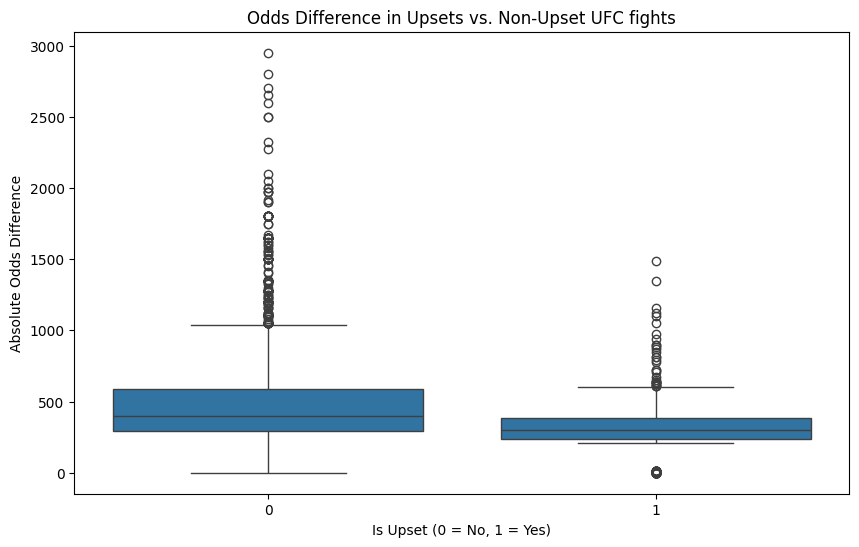

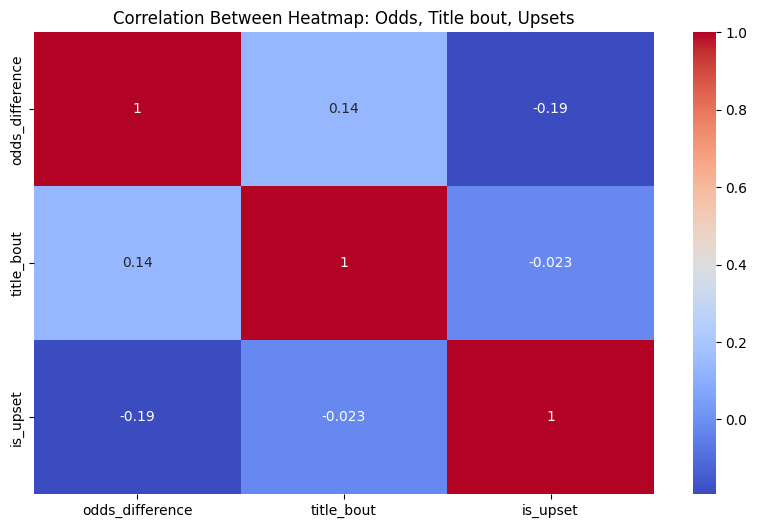

<ipython-input-9-eb8f8579b864>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contingency_table.index, y=contingency_table[1], palette="viridis")


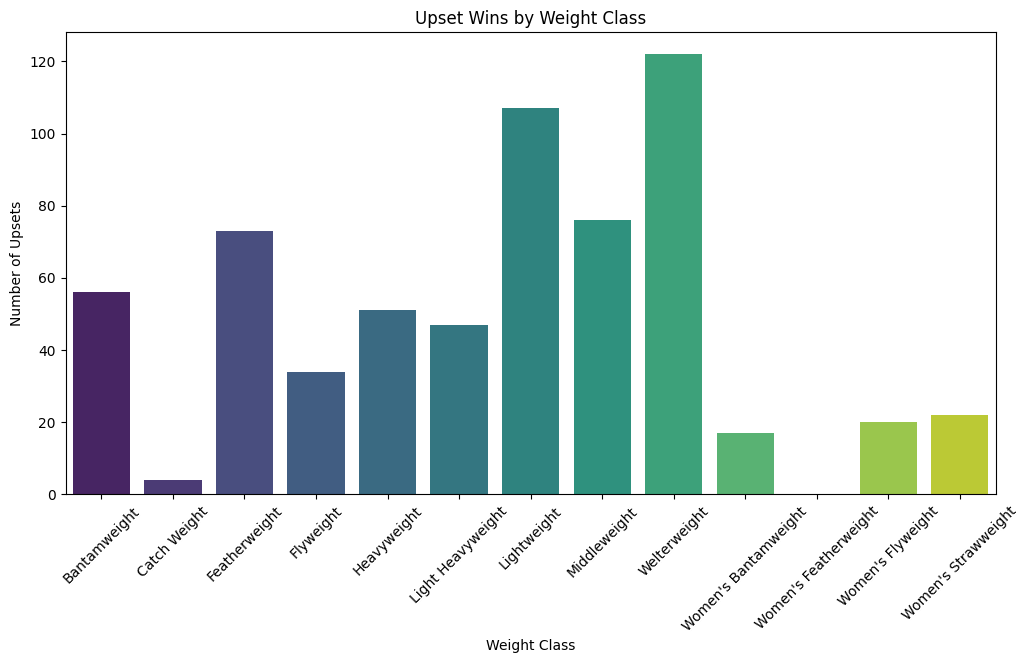

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
# from google.colab import files  # No longer needed for re-upload
import io

# Assuming you already have 'uploaded' and 'filename' from previous cell
# uploaded = files.upload()  # REMOVED - This line is no longer needed
# filename = list(uploaded.keys())[0]  # REMOVED - This line is no longer needed

# Get the actual filename from the uploaded dictionary (it might be different)
filename = list(uploaded.keys())[0]

# This is where you load your cleaned UFC dataset
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Use the actual filename
print(df.columns)

# create the is_upset column - JUST ADDED
df['expected_winner'] = df.apply(lambda row: 'R_fight' if row['R_odds'] < row['B_odds'] else 'B_fighter', axis=1)
df['is_upset'] = df.apply(lambda row: 1 if (row['expected_winner'] == 'R_fighter' and row['Winner'] == 'Blue') or
                                           (row['expected_winner'] == 'B_fighter' and row['Winner'] == 'Red') else 0,
                         axis=1)

# Compute difference of odds between fighters
df["odds_difference"] = abs(df["R_odds"] - df["B_odds"])
df = df.dropna(subset=["odds_difference"])

# This helps distinguish between UFC underdogs wins from expected prediction
upset_df = df[df['is_upset'] == 1]
non_upset_df = df[df['is_upset'] == 0]

# Compare odds in upsets vs. non-upsets
t_stat, p_value = ttest_ind(upset_df["odds_difference"], non_upset_df["odds_difference"])
print(f"Odds Difference p-value: {p_value:.4f}")

# step 2 code- Chi-square to test for weight class vs. upsets
df['weight_class'] = df['weight_class'].str.strip()  # make sure no extra spaces
contingency_table = pd.crosstab(df['weight_class'], df['is_upset'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Weight class p-value: = {p:.4f}")

# Location Analysis
# Compare upsets by country rates
country_set_rates = df.groupby("country")['is_upset'].mean().sort_values(ascending=False)
print("\nUpset Rates by Country:\n", country_set_rates)

# Box Plot: odds in Upsets vs. Non-upsets
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_upset', y="odds_difference", data=df)
plt.title("Odds Difference in Upsets vs. Non-Upset UFC fights")
plt.xlabel("Is Upset (0 = No, 1 = Yes)")
plt.ylabel("Absolute Odds Difference")
plt.savefig('odds_differential_boxplot.png')
plt.show()

# Heatmap: on numerical feature like odds, title_bout
plt.figure(figsize=(10, 6))
if df['title_bout'].dtype == 'object':
    df['title_bout'] = df['title_bout'].astype(int)
corr_matrix = df[["odds_difference", "title_bout", 'is_upset']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Heatmap: Odds, Title bout, Upsets")
plt.savefig('correlation_heatmap.png')
plt.show()

# Bar char : upset by class weight- just add
if 1 in contingency_table.columns:
    upset_counts = contingency_table[1]
else:
    upset_counts = pd.Series([0] * len(contingency_table), index=contingency_table.index)

# Bar-Chart upset by weight class
plt.figure(figsize=(12, 6))
sns.barplot(x=contingency_table.index, y=contingency_table[1], palette="viridis")
plt.title("Upset Wins by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Number of Upsets")
plt.xticks(rotation=45)
plt.savefig('weight_class_upsets.png')
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Select the relevant features for anomaly detection (e.g., odds, fighter stats)
x = df[['R_odds', 'B_odds', 'R_fighter', 'B_fighter']]

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the 'fighter' columns
x['R_fighter_encoded'] = encoder.fit_transform(x['R_fighter'])
x['B_fighter_encoded'] = encoder.fit_transform(x['B_fighter'])

# Select the encoded features and odds for the model
x_encoded = x[['R_fighter_encoded', 'B_fighter_encoded', 'R_odds', 'B_odds']]

# Create and train the Isolation Forest model
# Use the encoded features (x_encoded) instead of the original features (x)
model = IsolationForest(contamination='auto')
model.fit(x_encoded)  # Changed to x_encoded

# Predict anomaly scores
# Use the encoded features (x_encoded) for prediction as well
df['anomaly_score'] = model.decision_function(x_encoded)  # Changed to x_encoded

# Identify outliers
outliers = df[df['anomaly_score'] < -0.1]

print("Outliers:")
print(outliers)

Outliers:
                 R_fighter             B_fighter  R_odds  B_odds       date  \
24         Felicia Spencer           Zarah Fairn  -870.0   585.0  2/29/2020   
143   Valentina Shevchenko     Katlyn Chookagian  -920.0   610.0   2/8/2020   
154   Valentina Shevchenko         Liz Carmouche -1100.0   700.0  8/10/2019   
172          Devonte Smith          Khama Worthy -1000.0   650.0  8/17/2019   
302      Roxanne Modafferi         Maycee Barber   655.0  -830.0  1/18/2020   
...                    ...                   ...     ...     ...        ...   
3884            Tito Ortiz            Ryan Bader   500.0  -600.0   7/2/2011   
4129        Rodney Wallace            Phil Davis   600.0  -900.0   8/7/2010   
4134             Jon Jones  Vladimir Matyushenko  -752.0   602.0   8/1/2010   
4198        Anderson Silva           Demian Maia  -675.0   550.0  4/10/2010   
4199               BJ Penn         Frankie Edgar  -780.0   620.0  4/10/2010   

                             location    

<ipython-input-10-6c6a3cd70ea8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['R_fighter_encoded'] = encoder.fit_transform(x['R_fighter'])
<ipython-input-10-6c6a3cd70ea8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['B_fighter_encoded'] = encoder.fit_transform(x['B_fighter'])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files  # For file uploads in Colab
import io

# Assuming you uploaded the file in a previous cell:
# uploaded = files.upload()

# Get the filename from the uploaded dictionary (it might be different)
filename = list(uploaded.keys())[0]

# Read the CSV file into a pandas DataFrame using uploaded data
df = pd.read_csv(io.BytesIO(uploaded[filename]))

df[['weight_class', 'country']] = df[['weight_class', 'country']].fillna('Unknown')

# Compute difference of odds
df['odds_difference'] = df['R_odds'] - df['B_odds']

df['Winner'] = df.apply(
    lambda row: row['R_fighter'] if row['Winner'] == 'Red'
    else (row['B_fighter'] if row['Winner'] == 'Blue' else 'Draw'),
    axis=1
)

# Compute which fighter was the underdog
df['underdog'] = df.apply(lambda row: row['R_fighter'] if row['R_odds'] > row['B_odds'] else row['B_fighter'], axis=1)

# make 'is_upset' column
df['is_upset'] = (df['underdog'] == df['Winner']).astype(int)

# change 'title_bout' to numeric if needed
df['title_bout'] = df['title_bout'].fillna(0).astype(int)

print("How many upsets:", df['is_upset'].sum())
print("Value counts of 'Winner':\n", df['Winner'].value_counts())

# Drop draws for binary
df = df[df['Winner'] != 'Draw'].reset_index(drop=True)

# look for target variable
y = df['is_upset']

# encode categorical varibles One-hot
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['weight_class', 'country']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['weight_class', 'country']))

# Combine both numeric and encoded features
X_numeric = df[['odds_difference', 'title_bout']]
X = pd.concat([X_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# ... (Rest of your code) ...

How many upsets: 1440
Value counts of 'Winner':
 Winner
Draw                1361
Donald Cerrone        23
Charles Oliveira      17
Dustin Poirier        17
Max Holloway          17
                    ... 
Mario Miranda          1
John Gunderson         1
Maiquel Falcao         1
BJ Penn                1
Nick Pace              1
Name: count, Length: 1135, dtype: int64
